<a href="https://colab.research.google.com/github/chitaha/Machine-Learning/blob/master/iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [0]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Load the dataset

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [6]:
link = "https://drive.google.com/open?id=1eVoiTUYF6nzHd0EzVrtrWpWazWkLFKP0"
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1eVoiTUYF6nzHd0EzVrtrWpWazWkLFKP0


In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('iris.csv')  
# df3 = pd.read_csv('Filename.csv')
# Dataset is now stored in a Pandas Dataframe
names = ["sepal_lenght", "sepal_width", "petal_length", "petal_width", "class"]
dataset = read_csv("iris.csv", names=names)

# Summarize the dataset
* Dimensions of the dataset.
* Peek at the data itself.
* Statistical summary of all attributes.
* Breakdown of the data by the class variable.

## Dimensions of the dataset

In [8]:
print(dataset.shape)

(150, 5)


## Peek at the data

In [9]:
dataset.head(20)

,sepal_lenght,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


## Statistical Summary

In [10]:
print(dataset.describe())

       sepal_lenght  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


## Class distribution

In [11]:
print(dataset.groupby("class").size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


# Data Visualization
* Univariate plots to better understand each attribute.
* Multivariate plots to better understand the relationships between attributes.

## Univariate plots

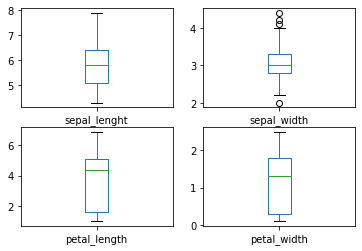

In [12]:
# box and whisker plots
dataset.plot(kind="box", subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

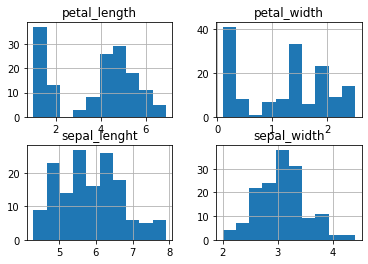

In [13]:
# histograms
dataset.hist()
pyplot.show()

## Multivariate plots

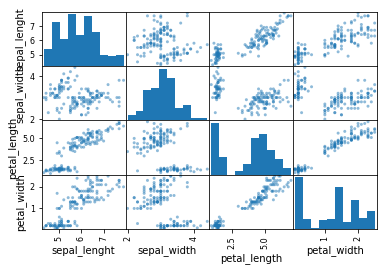

In [14]:
# scatter plot matrix
scatter_matrix(dataset)
pyplot.show()

# Evaluate some algorithms
* Separate out a validation dataset.
* Set-up the test harness to use 10-fold cross validation.
* Build multiple different models to predict species from flower measurements
* Select the best model.

## Create a validation dataset

In [0]:
# Split out the validation dataset
array = dataset.values
# print(array)
x = array[:,0:4]
y = array[:,4]
x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size=0.20, random_state=1)

# Build models
* Logistic Regression (LR)
* Linear Discriminant Analysis (LDA)
* K-Nearest Neighbors (KNN).
* Classification and Regression Trees (CART).
* Gaussian Naive Bayes (NB).
* Support Vector Machines (SVM).

In [16]:
models = []
models.append(("LR", LogisticRegression(solver="liblinear", multi_class="ovr")))
models.append(("LDA", LinearDiscriminantAnalysis()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("CART", DecisionTreeClassifier()))
models.append(("NB", GaussianNB()))
models.append(("SVM", SVC(gamma="auto")))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    print("{}: {} ({})".format(name, cv_results.mean(), cv_results.std()))

LR: 0.9416666666666667 (0.06508541396588878)
LDA: 0.975 (0.03818813079129868)
KNN: 0.9583333333333333 (0.04166666666666669)
CART: 0.9499999999999998 (0.04082482904638632)
NB: 0.95 (0.05527707983925667)
SVM: 0.9833333333333332 (0.03333333333333335)


## Select the best model

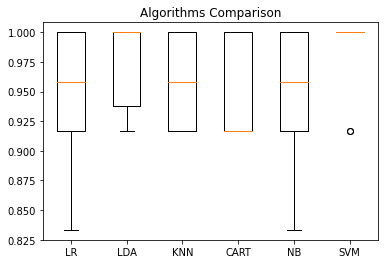

In [17]:
# compare algorithms
pyplot.boxplot(results, labels=names)
pyplot.title("Algorithms Comparison")
pyplot.show()

# Make Predictions

In [0]:
# Make predictions on validation dataset
model = SVC(gamma="auto")
model.fit(x_train, y_train)
predictions = model.predict(x_validation)

## Evaluate predictions

In [20]:
print(accuracy_score(y_validation, predictions))
print(confusion_matrix(y_validation, predictions))
print(classification_report(y_validation, predictions))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

